In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the standard Advertising dataset

In [2]:
# Read the 'Advertising_adj.csv' file
df = pd.read_csv('Advertising_adj.csv')

In [3]:
# Use your bootstrap function from the previous exercise
def bootstrap(df):
    selectionIndex = np.random.randint(len(df), size = len(df))
    new_df = df.iloc[selectionIndex]
    return new_df

In [4]:
# Like last time, create a list of beta values using 1000 bootstraps of your original data
beta0_list, beta1_list = [],[]

numberOfBootstraps = 100

for i in range(numberOfBootstraps):
    df_new = bootstrap(df)
    
    xmean = df_new.tv.mean()
    ymean = df_new.sales.mean()
    
    beta1 = (((df_new.tv - xmean)*(df_new.sales - ymean)).sum())/(((df_new.tv - xmean)**2).sum())
    beta0 = ymean - beta1*xmean
    
    beta0_list.append(beta0)
    beta1_list.append(beta1)

In [5]:
### edTest(test_sort) ###

# Sort the two lists of beta values  from lowest value to highest 
beta0_list.sort();
beta1_list.sort();

In [6]:
### edTest(test_beta) ###

# Now we find the confidence interval
# Find the 95% percent confidence interval using the percentile function
beta0_CI = (np.percentile(beta0_list,2.5),np.percentile(beta0_list,97.5))

beta1_CI = (np.percentile(beta1_list,2.5),np.percentile(beta1_list,97.5))

In [7]:
#Print the confidence interval of beta0 upto 3 decimal points
print(f'The beta0 confidence interval is {beta0_CI}')

The beta0 confidence interval is (135.19638515933522, 163.7355152432198)


In [8]:
#Print the confidence interval of beta1 upto 3 decimal points
print(f'The beta1 confidence interval is {beta1_CI}')

The beta1 confidence interval is (0.8698092980201402, 1.1365810341203768)


In [9]:
# Use this helper function to plot the histogram of beta values along with the 95% confidence interval
def plot_simulation(simulation,confidence):
    plt.hist(simulation, bins = 30, label = 'beta distribution', align = 'left', density = True)
    plt.axvline(confidence[1], 0, 1, color = 'r', label = 'Right Interval')
    plt.axvline(confidence[0], 0, 1, color = 'red', label = 'Left Interval')
    plt.xlabel('Beta value')
    plt.ylabel('Frequency')
    plt.title('Confidence Interval')
    plt.legend(frameon = False, loc = 'upper right')


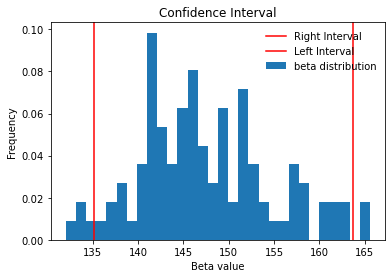

In [10]:
# Plot for beta 0
plot_simulation(beta0_list,beta0_CI)

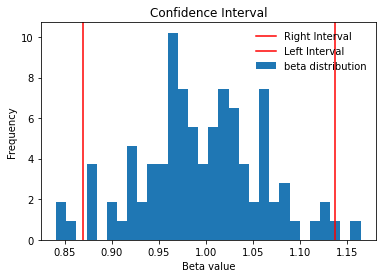

In [11]:
#Plot for beta 1
plot_simulation(beta1_list,beta1_CI)